# Libraries

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.optimize import curve_fit
import scipy.stats as stats

# Cytometric Bead Assay (CBA)

## Sample Data

In [105]:
# Sample data
df_sample = pd.read_excel("data_macrophage/CBA/csv/11am plate 3 cytometer 2 pod 17 & 17 & 27 & 25.xlsx")
df_sample

,Sample,beads | Freq. of Parent,beads/tnf | Freq. of Parent,beads/tnf | Mean (PE-A :: null)
0,Specimen_001_A1_A01.fcs,4.49,95.80,7.94
1,Specimen_001_A2_A02.fcs,19.10,98.40,5.82
2,Specimen_001_A3_A03.fcs,20.80,98.80,49.00
3,Specimen_001_B1_B01.fcs,4.22,100.00,1409.00
4,Specimen_001_B2_B02.fcs,25.10,99.00,1519.00
...,...,...,...,...
93,Specimen_004_H10_H10.fcs,15.00,95.30,8.01
94,Specimen_004_H11_H11.fcs,3.73,95.60,14.50
95,Specimen_004_H12_H12.fcs,2.22,84.60,33.00
96,Mean,12.00,94.90,898.00


In [106]:
df_filtered = df_sample[:24]
df_filtered

,Sample,beads | Freq. of Parent,beads/tnf | Freq. of Parent,beads/tnf | Mean (PE-A :: null)
0,Specimen_001_A1_A01.fcs,4.49,95.8,7.94
1,Specimen_001_A2_A02.fcs,19.10,98.4,5.82
2,Specimen_001_A3_A03.fcs,20.80,98.8,49.00
3,Specimen_001_B1_B01.fcs,4.22,100.0,1409.00
4,Specimen_001_B2_B02.fcs,25.10,99.0,1519.00
5,Specimen_001_B3_B03.fcs,19.40,99.5,1455.00
6,Specimen_001_C1_C01.fcs,9.59,96.8,1115.00
7,Specimen_001_C2_C02.fcs,18.20,97.7,1123.00
8,Specimen_001_C3_C03.fcs,25.00,99.4,1297.00
9,Specimen_001_D1_D01.fcs,3.93,91.7,876.00


## Standard Data

In [107]:
# Standard
df_standard = pd.read_excel("data_macrophage/CBA/csv/standard cytometer 3.xlsx")
df_standard

,Sample,beads | Freq. of Parent,beads/tnf | Freq. of Parent,beads/tnf | Mean (PE-A :: null)
0,Specimen_001_A1_A01.fcs,16.20,95.20,1562.00
1,Specimen_001_A2_A02.fcs,21.00,98.00,955.00
2,Specimen_001_A3_A03.fcs,22.50,95.70,572.00
3,Specimen_001_A4_A04.fcs,27.90,98.10,268.00
4,Specimen_001_A5_A05.fcs,23.00,97.10,157.00
5,Specimen_001_A6_A06.fcs,25.90,99.50,55.80
6,Specimen_001_A7_A07.fcs,22.50,97.10,41.50
7,Specimen_001_A8_A08.fcs,26.40,98.40,20.70
8,Specimen_001_A9_A09.fcs,19.50,97.30,16.80
9,Specimen_001_A10_A10.fcs,23.50,97.90,9.34


## Generic trendline for scatter plot

In [108]:
x_tnf = np.array([2500, 1250, 625, 312, 156, 80, 40, 20, 10, 5, 2.5, 0])
y_mfi = np.array(df_standard["beads/tnf | Mean (PE-A :: null)"].iloc[0:12])

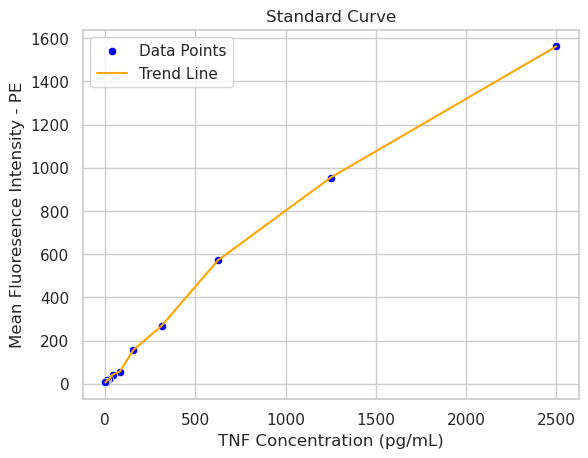

In [109]:
# Scatter plot for data points
sns.scatterplot(x=x_tnf, y=y_mfi, color='blue', label='Data Points')

# Line plot for the trend line using matplotlib
plt.plot(x_tnf, y_mfi, color='orange', label='Trend Line')

# Customize the plot
plt.title("Standard Curve")
plt.xlabel("TNF Concentration (pg/mL)")
plt.ylabel("Mean Fluoresence Intensity - PE")
plt.legend()
plt.show()

## Sigmoidal 4PL, X is concentration Function

In [110]:
# Define the 4PL function
def four_param_logistic(x, A, B, C, D):
    return ((A - D) / (1.0 + ((x / C) ** B))) + D

In [111]:
# Initial parameter guesses for A, B, C, D
initial_guess = [min(y_mfi), 1, np.median(x_tnf), max(y_mfi)]

# Fit the 4PL model to the data
params, _ = curve_fit(four_param_logistic, x_tnf, y_mfi, p0=initial_guess, maxfev=10000)

# Generate x values for the fitted curve
x_fit = np.linspace(min(x_tnf), max(x_tnf), 100)
y_fit = four_param_logistic(x_fit, *params)

/tmp/ipykernel_13132/1527236024.py:3: RuntimeWarning: divide by zero encountered in power
  return ((A - D) / (1.0 + ((x / C) ** B))) + D


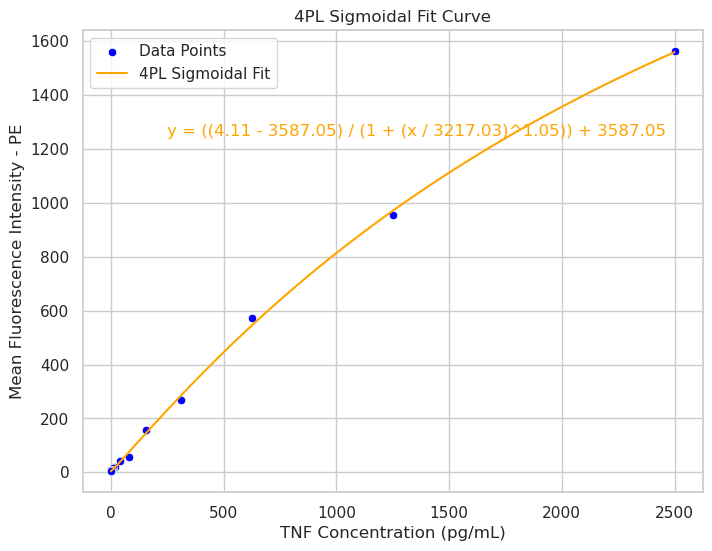

Fitted parameters:
A (bottom asymptote) = 4.11
B (Hill's slope) = 1.05
C (inflection point) = 3217.03
D (top asymptote) = 3587.05

Fitted 4PL Equation:
y = ((4.11 - 3587.05) / (1 + (x / 3217.03)^1.05)) + 3587.05


In [112]:
# Plot the data points and the fitted 4PL curve
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_tnf, y=y_mfi, color='blue', label='Data Points')
plt.plot(x_fit, y_fit, color='orange', label='4PL Sigmoidal Fit')

# Display the equation parameters on the plot
equation_text = (f"y = (({params[0]:.2f} - {params[3]:.2f}) / "
                 f"(1 + (x / {params[2]:.2f})^{params[1]:.2f})) + {params[3]:.2f}")
plt.text(0.1 * max(x_tnf), 0.8 * max(y_mfi), equation_text, fontsize=12, color="orange")

# Customize plot
plt.title("4PL Sigmoidal Fit Curve")
plt.xlabel("TNF Concentration (pg/mL)")
plt.ylabel("Mean Fluorescence Intensity - PE")
plt.legend()
plt.show()

# Print the fitted parameters and equation
print("Fitted parameters:")
print(f"A (bottom asymptote) = {params[0]:.2f}")
print(f"B (Hill's slope) = {params[1]:.2f}")
print(f"C (inflection point) = {params[2]:.2f}")
print(f"D (top asymptote) = {params[3]:.2f}")
print("\nFitted 4PL Equation:")
print(equation_text)


## Interpolate TNF Concentrations

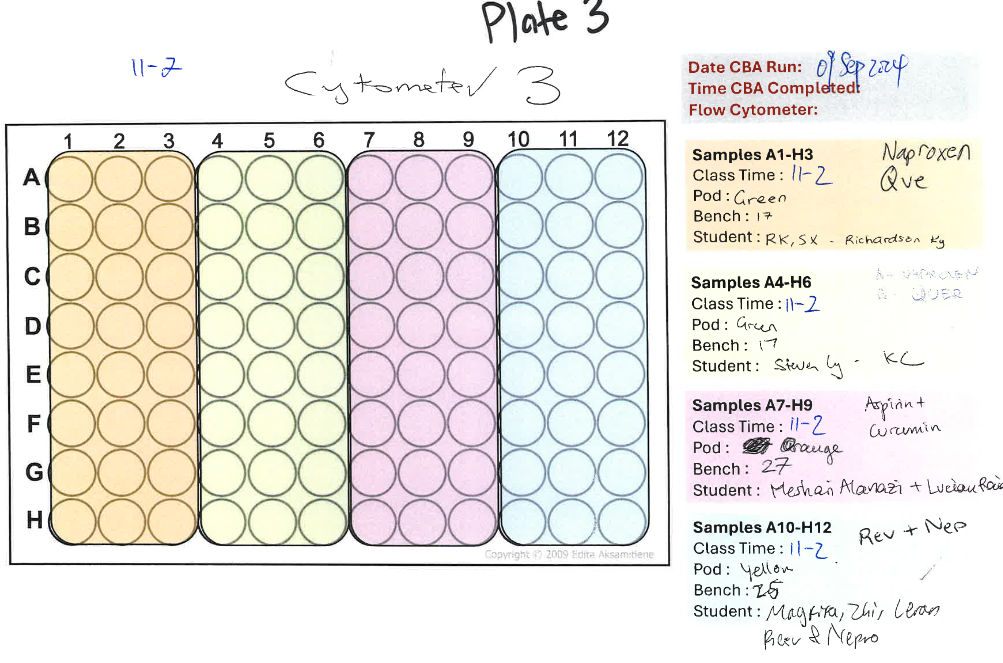

In [113]:
# Equation
# y = ((4.11 - 3587.05) / (1 + (x / 3217.03)^1.05)) + 3587.05

In [114]:
# Fitted parameters
A = 4.11  # Bottom asymptote
B = 1.05  # Hill's slope
C = 3217.03  # Inflection point
D = 3587.05  # Top asymptote

# Define the inverse 4PL equation to solve for x (TNF concentration)
def calculate_tnf_concentration(y, A, B, C, D):
    if y <= D:
        return C * (((A - D) / (y - D)) - 1)**(1 / B)
    else:
        return np.nan  # Handle case where y > D (not realistic for this fit)

# Apply the function to calculate TNF concentration for each MFI value
df_filtered['Interpolated_TNF'] = df_filtered['beads/tnf | Mean (PE-A :: null)'].apply(lambda y: calculate_tnf_concentration(y, A, B, C, D))

# Display the updated DataFrame
df_filtered

/tmp/ipykernel_13132/3041856232.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Interpolated_TNF'] = df_filtered['beads/tnf | Mean (PE-A :: null)'].apply(lambda y: calculate_tnf_concentration(y, A, B, C, D))


,Sample,beads | Freq. of Parent,beads/tnf | Freq. of Parent,beads/tnf | Mean (PE-A :: null),Interpolated_TNF
0,Specimen_001_A1_A01.fcs,4.49,95.8,7.94,4.767985
1,Specimen_001_A2_A02.fcs,19.10,98.4,5.82,2.210872
2,Specimen_001_A3_A03.fcs,20.80,98.8,49.00,50.252274
3,Specimen_001_B1_B01.fcs,4.22,100.0,1409.00,2118.836613
4,Specimen_001_B2_B02.fcs,25.10,99.0,1519.00,2391.730902
5,Specimen_001_B3_B03.fcs,19.40,99.5,1455.00,2229.730379
6,Specimen_001_C1_C01.fcs,9.59,96.8,1115.00,1501.796602
7,Specimen_001_C2_C02.fcs,18.20,97.7,1123.00,1516.770086
8,Specimen_001_C3_C03.fcs,25.00,99.4,1297.00,1866.357091
9,Specimen_001_D1_D01.fcs,3.93,91.7,876.00,1092.043741


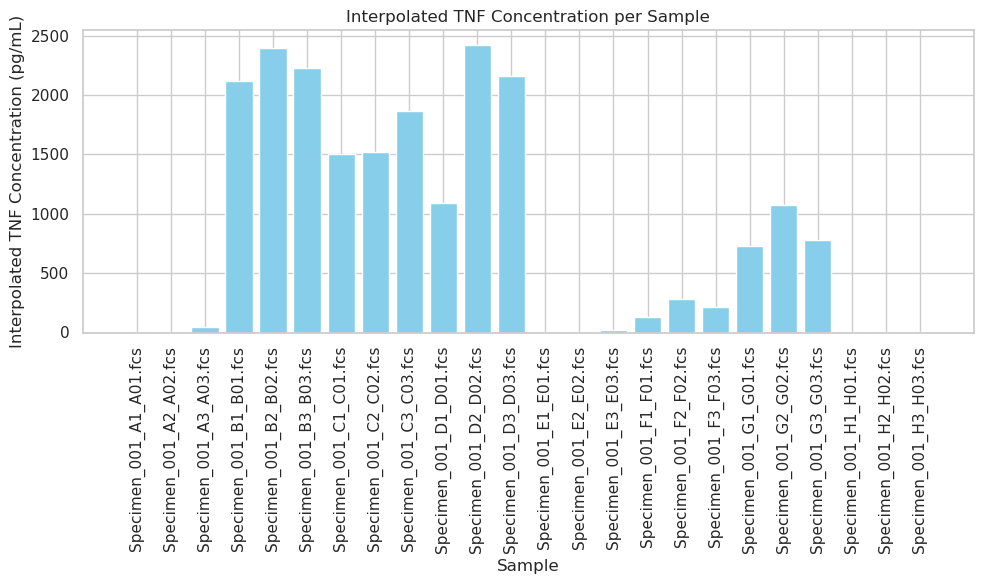

In [115]:
# Displalay graph
plt.figure(figsize=(10, 6))
plt.bar(df_filtered['Sample'], df_filtered['Interpolated_TNF'], color='skyblue')
plt.xlabel('Sample')
plt.ylabel('Interpolated TNF Concentration (pg/mL)')
plt.title('Interpolated TNF Concentration per Sample')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [116]:
df_filtered

,Sample,beads | Freq. of Parent,beads/tnf | Freq. of Parent,beads/tnf | Mean (PE-A :: null),Interpolated_TNF
0,Specimen_001_A1_A01.fcs,4.49,95.8,7.94,4.767985
1,Specimen_001_A2_A02.fcs,19.10,98.4,5.82,2.210872
2,Specimen_001_A3_A03.fcs,20.80,98.8,49.00,50.252274
3,Specimen_001_B1_B01.fcs,4.22,100.0,1409.00,2118.836613
4,Specimen_001_B2_B02.fcs,25.10,99.0,1519.00,2391.730902
5,Specimen_001_B3_B03.fcs,19.40,99.5,1455.00,2229.730379
6,Specimen_001_C1_C01.fcs,9.59,96.8,1115.00,1501.796602
7,Specimen_001_C2_C02.fcs,18.20,97.7,1123.00,1516.770086
8,Specimen_001_C3_C03.fcs,25.00,99.4,1297.00,1866.357091
9,Specimen_001_D1_D01.fcs,3.93,91.7,876.00,1092.043741


## Average Graph and Stats

Average TNF Concentrations:
{'Media Only': 19.077043559217024, 'LPS': 2246.765964638687, 'Naproxen High + LPS': 1628.307926256395, 'Naproxen Low + LPS': 1891.503232830937, 'Naproxen No LPS': 10.729804320675994, 'Quercetin High + LPS': 208.5138937342161, 'Quercetin Low + LPS': 858.669760516675, 'Quercetin No LPS': 4.780804199076882}
ANOVA result:
F_onewayResult(statistic=35.30552974069495, pvalue=1.444164665866923e-08)


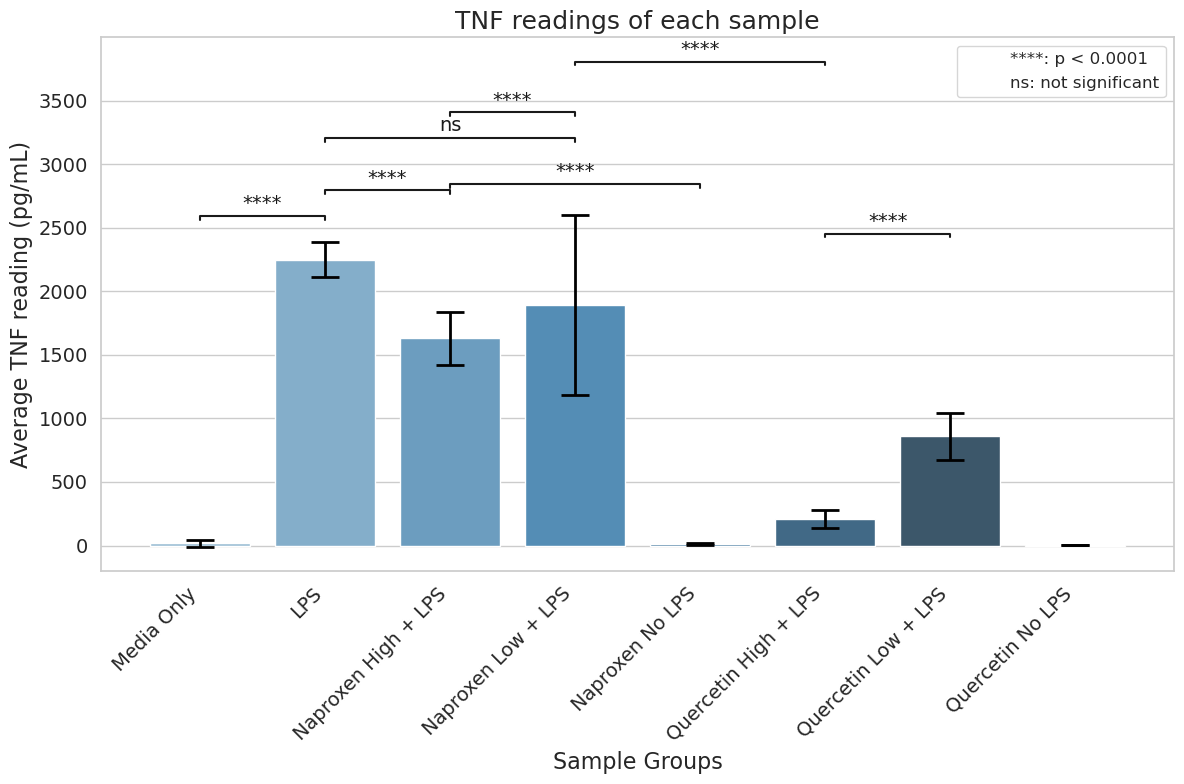

In [135]:
# Define sample groups
sample_groups = {
    'Media Only': ['Specimen_001_A1_A01.fcs', 'Specimen_001_A2_A02.fcs', 'Specimen_001_A3_A03.fcs'],
    'LPS': ['Specimen_001_B1_B01.fcs', 'Specimen_001_B2_B02.fcs', 'Specimen_001_B3_B03.fcs'],
    'Naproxen High + LPS': ['Specimen_001_C1_C01.fcs', 'Specimen_001_C2_C02.fcs', 'Specimen_001_C3_C03.fcs'],
    'Naproxen Low + LPS': ['Specimen_001_D1_D01.fcs', 'Specimen_001_D2_D02.fcs', 'Specimen_001_D3_D03.fcs'],
    'Naproxen No LPS': ['Specimen_001_E1_E01.fcs', 'Specimen_001_E2_E02.fcs', 'Specimen_001_E3_E03.fcs'],
    'Quercetin High + LPS': ['Specimen_001_F1_F01.fcs', 'Specimen_001_F2_F02.fcs', 'Specimen_001_F3_F03.fcs'],
    'Quercetin Low + LPS': ['Specimen_001_G1_G01.fcs', 'Specimen_001_G2_G02.fcs', 'Specimen_001_G3_G03.fcs'],
    'Quercetin No LPS': ['Specimen_001_H1_H01.fcs', 'Specimen_001_H2_H02.fcs', 'Specimen_001_H3_H03.fcs']
}

# Calculate average TNF concentration and standard deviation for each group
average_tnf = {}
std_tnf = {}
all_groups_data = []
for group, samples in sample_groups.items():
    group_data = df_filtered[df_filtered['Sample'].isin(samples)]
    # Filter out NaN values
    valid_data = group_data['Interpolated_TNF'].dropna()
    all_groups_data.append(valid_data)
    if not valid_data.empty:
        average_tnf[group] = valid_data.mean()
        std_tnf[group] = valid_data.std()
    else:
        average_tnf[group] = 0
        std_tnf[group] = 0

# Debug: Print the calculated average TNF concentrations
print("Average TNF Concentrations:")
print(average_tnf)

# Perform ANOVA
anova_result = f_oneway(*all_groups_data)
print("ANOVA result:")
print(anova_result)

# Convert to DataFrame for easier plotting
average_tnf_df = pd.DataFrame(list(average_tnf.items()), columns=['Sample Group', 'Average TNF Concentration'])
std_tnf_df = pd.DataFrame(list(std_tnf.items()), columns=['Sample Group', 'Standard Deviation'])
merged_df = pd.merge(average_tnf_df, std_tnf_df, on='Sample Group')

# Ensure there are no NaN or zero values before plotting
if merged_df['Average TNF Concentration'].sum() == 0:
    print("Warning: All TNF concentrations are zero or missing. Check your data.")
else:
    # Plot the data
    plt.figure(figsize=(12, 8))  # Decrease bar size
    sns.set(style="whitegrid")
    barplot = sns.barplot(
        x='Sample Group', 
        y='Average TNF Concentration', 
        data=merged_df, 
        ci=None, 
        palette='Blues_d',  # Apply blue color scheme
        capsize=0.2, 
        errcolor='black', 
        errwidth=1.5
    )

    # Add error bars with caps
    for i, (mean, std) in enumerate(zip(merged_df['Average TNF Concentration'], merged_df['Standard Deviation'])):
        plt.errorbar(
            i, mean, yerr=std, fmt='none', ecolor='black', capsize=10, capthick=2, elinewidth=2
        )

    # Add statistical significance markers
    significance_data = {
        ('Media Only', 'LPS'): '****',
        ('LPS', 'Naproxen High + LPS'): '****',
        ('LPS', 'Naproxen Low + LPS'): 'ns',
        ('Naproxen High + LPS', 'Naproxen Low + LPS'): '****',
        ('Naproxen High + LPS', 'Naproxen No LPS'): '****',
        ('Naproxen Low + LPS', 'Quercetin High + LPS'): '****',
        ('Quercetin High + LPS', 'Quercetin Low + LPS'): '****'
    }

    y_offset = 180  # Vertical offset for significance lines
    for (group1, group2), significance in significance_data.items():
        try:
            x1 = merged_df[merged_df['Sample Group'] == group1].index[0]
            x2 = merged_df[merged_df['Sample Group'] == group2].index[0]
            y = max(merged_df['Average TNF Concentration'][x1] + merged_df['Standard Deviation'][x1],
                    merged_df['Average TNF Concentration'][x2] + merged_df['Standard Deviation'][x2]) + y_offset
            plt.plot([x1, x1, x2, x2], [y, y + 30, y + 30, y], lw=1.5, c='k')  # Adjust the height to avoid overlapping with text
            plt.text((x1 + x2) * .5, y + 50, significance, ha='center', va='bottom', color='k', fontsize=14)  # Increase spacing for text
            y_offset += 200
        except IndexError:
            # Skip if either group is missing
            continue

    # Add legend for statistical significance markers
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='black', lw=0, label='****: p < 0.0001'),
        Line2D([0], [0], color='black', lw=0, label='ns: not significant')
    ]
    plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

    plt.xlabel('Sample Groups', fontsize=16)  # Increase font size
    plt.ylabel('Average TNF reading (pg/mL)', fontsize=16)  # Increase font size
    plt.title('TNF readings of each sample', fontsize=18)  # Increase font size
    plt.xticks(rotation=45, ha='right', fontsize=14)  # Increase font size
    plt.yticks(fontsize=14)  # Increase font size
    plt.tight_layout()
    plt.show()

# Greiss Assay (Nitric Oxide)

Calculations done in excel spreadsheet. Graphing with Python to ensure consistency in presentation.

## Standard Curve

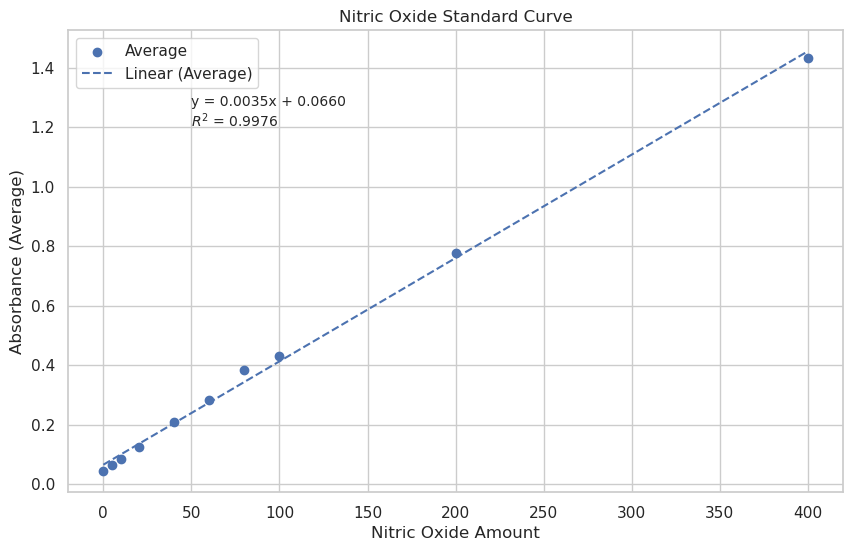

In [136]:
# Data for Nitric Oxide Standard Curve
nitric_oxide_amount = np.array([0, 5, 10, 20, 40, 60, 80, 100, 200, 400])
average = np.array([0.044, 0.064333333, 0.084, 0.126333333, 0.208666667, 
                    0.283, 0.384333333, 0.432333333, 0.777666667, 1.433333333])
normalized_to_blank = np.array([0, 0.020333333, 0.04, 0.082333333, 0.164666667,
                                0.239, 0.340333333, 0.388333333, 0.733666667, 1.390333333])

# Fit a linear regression model to the data
coefficients = np.polyfit(nitric_oxide_amount, average, 1)
polynomial = np.poly1d(coefficients)
trendline = polynomial(nitric_oxide_amount)

# Calculate R-squared
correlation_matrix = np.corrcoef(nitric_oxide_amount, average)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

# Plotting the data
plt.figure(figsize=(10, 6))
plt.scatter(nitric_oxide_amount, average, label='Average', color='C0')
plt.plot(nitric_oxide_amount, trendline, linestyle='--', color='C0', label='Linear (Average)')

# Add equation and R-squared to the plot
plt.text(50, 1.2, f'y = {coefficients[0]:.4f}x + {coefficients[1]:.4f}\n$R^2$ = {r_squared:.4f}', fontsize=10)

# Labeling the plot
plt.title('Nitric Oxide Standard Curve')
plt.xlabel('Nitric Oxide Amount')
plt.ylabel('Absorbance (Average)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Average Graph and Stats

### Draft 1

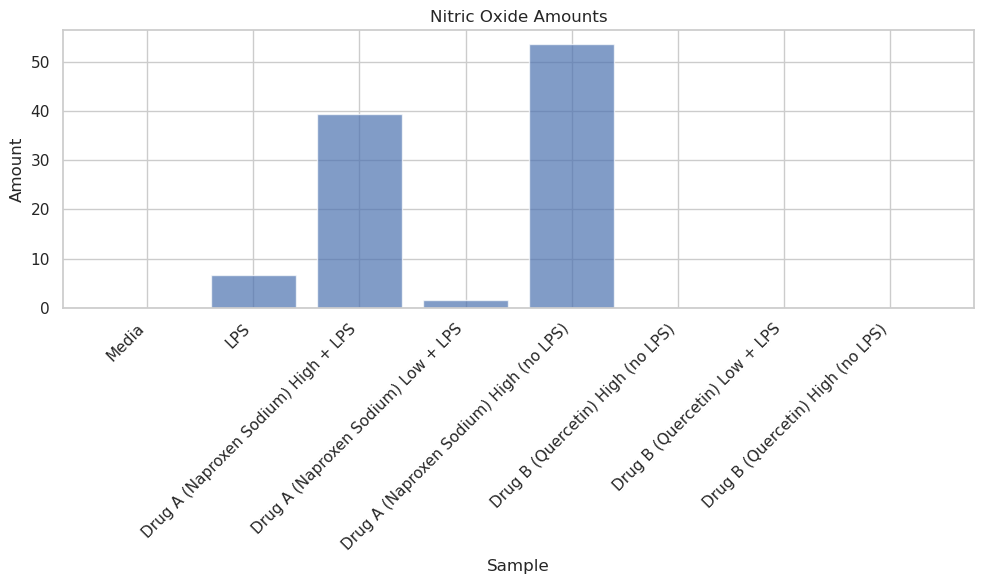

In [119]:
# Data from the spreadsheet
samples = [
    'Media',
    'LPS',
    'Drug A (Naproxen Sodium) High + LPS',
    'Drug A (Naproxen Sodium) Low + LPS',
    'Drug A (Naproxen Sodium) High (no LPS)',
    'Drug B (Quercetin) High (no LPS)',
    'Drug B (Quercetin) Low + LPS',
    'Drug B (Quercetin) High (no LPS)'
]

amounts = [
    0,
    6.6,
    39.36190477,
    1.552380951,
    53.64761906,
    0,
    0,
    0
]

# Creating the bar chart
plt.figure(figsize=(10, 6))
x_pos = np.arange(len(samples))

plt.bar(x_pos, amounts, align='center', alpha=0.7)
plt.xticks(x_pos, samples, rotation=45, ha='right')
plt.xlabel('Sample')
plt.ylabel('Amount')
plt.title('Nitric Oxide Amounts')
plt.tight_layout()

# Display the chart
plt.show()

### Draft 2

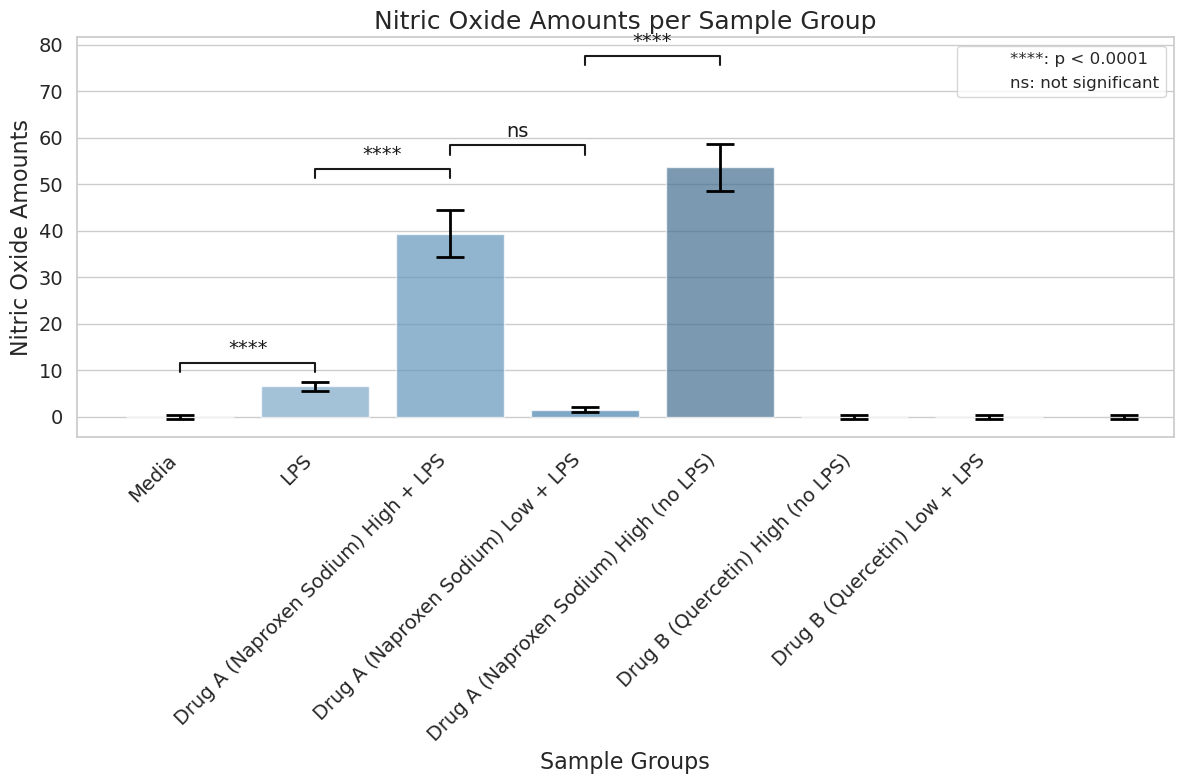

In [148]:
# Data from the spreadsheet
samples = [
    'Media',
    'LPS',
    'Drug A (Naproxen Sodium) High + LPS',
    'Drug A (Naproxen Sodium) Low + LPS',
    'Drug A (Naproxen Sodium) High (no LPS)',
    'Drug B (Quercetin) High (no LPS)',
    'Drug B (Quercetin) Low + LPS',
    'Drug B (Quercetin) High (no LPS)'
]

amounts = [
    0,
    6.6,
    39.36190477,
    1.552380951,
    53.64761906,
    0,
    0,
    0
]

# Creating the bar chart
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
x_pos = np.arange(len(samples))

# Plotting the bar chart
barplot = sns.barplot(
    x=samples, 
    y=amounts, 
    ci=None, 
    palette='Blues_d', 
    capsize=0.2, 
    errcolor='black', 
    errwidth=1.5, 
    alpha=0.7
)

# Adding error bars (dummy standard deviations for demonstration purposes)
std_dev = [0.5, 1, 5, 0.5, 5, 0.5, 0.5, 0.5]
for i, (mean, std) in enumerate(zip(amounts, std_dev)):
    plt.errorbar(
        i, mean, yerr=std, fmt='none', ecolor='black', capsize=10, capthick=2, elinewidth=2
    )

# Add statistical significance markers (dummy data for demonstration purposes)
significance_data = {
    ('Media', 'LPS'): '****',
    ('LPS', 'Drug A (Naproxen Sodium) High + LPS'): '****',
    ('Drug A (Naproxen Sodium) High + LPS', 'Drug A (Naproxen Sodium) Low + LPS'): 'ns',
    ('Drug A (Naproxen Sodium) Low + LPS', 'Drug A (Naproxen Sodium) High (no LPS)'): '****'
}

y_offset = 2  # Vertical offset for significance lines
for (group1, group2), significance in significance_data.items():
    try:
        x1 = samples.index(group1)
        x2 = samples.index(group2)
        y = max(amounts[x1] + std_dev[x1], amounts[x2] + std_dev[x2]) + y_offset
        plt.plot([x1, x1, x2, x2], [y, y + 2, y + 2, y], lw=1.5, c='k')
        plt.text((x1 + x2) * .5, y + 3, significance, ha='center', va='bottom', color='k', fontsize=14)
        y_offset += 5
    except IndexError:
        # Skip if either group is missing
        continue

# Add legend for statistical significance markers
from matplotlib.lines import Line2D
legend_elements = [
    Line2D([0], [0], color='black', lw=0, label='****: p < 0.0001'),
    Line2D([0], [0], color='black', lw=0, label='ns: not significant')
]
plt.legend(handles=legend_elements, loc='upper right', fontsize=12)

# Setting labels and title
plt.xlabel('Sample Groups', fontsize=16)
plt.ylabel('Nitric Oxide Amounts', fontsize=16)
plt.title('Nitric Oxide Amounts per Sample Group', fontsize=18)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()

# Display the chart
plt.show()